# **Import packages**

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **Bi-Linear Interpolation functions**


In [3]:
def custom_bilinear(matrix, scale_factor):
    """
    Zooming in using Bilinear Interpolation

    Parameters:
    matrix: Input 2D image
    scale_factor (float): Factor by which to scale the matrix

    Returns:
    numpy.ndarray: Scaled matrix
    """
    # Get original dimensions
    orig_height, orig_width = matrix.shape

    # Calculate new dimensions using round to match scipy
    new_height = int(np.round(orig_height * scale_factor))
    new_width = int(np.round(orig_width * scale_factor))

    # Create output array
    scaled = np.zeros((new_height, new_width))

    # Calculate scaling factors
    x_ratio = (orig_width - 1) / (new_width - 1) if new_width > 1 else 0
    y_ratio = (orig_height - 1) / (new_height - 1) if new_height > 1 else 0

    # Iterate through each pixel in the output image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate source coordinates
            y = i * y_ratio
            x = j * x_ratio

            # Get integer and fractional parts
            y_int = int(y)
            x_int = int(x)
            y_frac = y - y_int
            x_frac = x - x_int

            # Ensure we don't exceed bounds
            y_int_plus_1 = min(y_int + 1, orig_height - 1)
            x_int_plus_1 = min(x_int + 1, orig_width - 1)

            # Get values at neighboring pixels
            f00 = matrix[y_int, x_int]
            f10 = matrix[y_int_plus_1, x_int]
            f01 = matrix[y_int, x_int_plus_1]
            f11 = matrix[y_int_plus_1, x_int_plus_1]

            # Interpolate
            scaled[i, j] = (
                f00 * (1 - x_frac) * (1 - y_frac) +
                f10 * (1 - x_frac) * y_frac +
                f01 * x_frac * (1 - y_frac) +
                f11 * x_frac * y_frac
            )

    return scaled

In [1]:
def custom_shrink(matrix, scale_factor):
    """
    Shrink an image using area averaging to prevent aliasing.

    Parameters:
    matrix: Input 2D image
    scale_factor (float): Factor by which to scale the matrix (should be < 1)

    Returns:
    numpy.ndarray: Shrunk matrix
    """
    if scale_factor >= 1:
        return custom_bilinear(matrix, scale_factor)

    # Get original dimensions
    orig_height, orig_width = matrix.shape

    # Calculate new dimensions
    new_height = int(np.round(orig_height * scale_factor))
    new_width = int(np.round(orig_width * scale_factor))

    # Create output array
    scaled = np.zeros((new_height, new_width))

    # Calculate the size of the area in the source image that maps to one pixel in the output
    x_box = orig_width / new_width
    y_box = orig_height / new_height

    # Iterate through each pixel in the output image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the boundaries of the source area
            y_start = int(i * y_box)
            y_end = int((i + 1) * y_box)
            x_start = int(j * x_box)
            x_end = int((j + 1) * x_box)

            # Handle edge cases
            y_end = min(y_end, orig_height)
            x_end = min(x_end, orig_width)

            # Calculate the average of all pixels in the box
            box = matrix[y_start:y_end, x_start:x_end]
            scaled[i, j] = np.mean(box)

    return scaled

In [5]:
def  bilinear_resize(image, scale_factor):
  """
  Driver function for selecting either zooming in or shrinking

  Parameters:
  matrix: 2D Image
  scale_factor: Factor by which to scale the image

  Returns:
  numpy.ndarray: Scaled image
  """

  if scale_factor >= 1:
    return custom_bilinear(image, scale_factor)
  else:
    return custom_shrink(image, scale_factor)

# **Main Method**

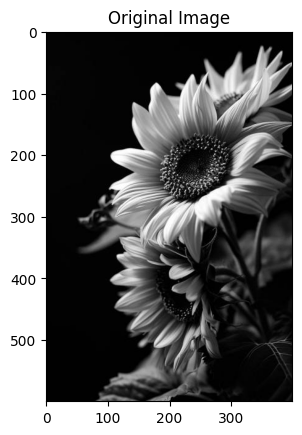

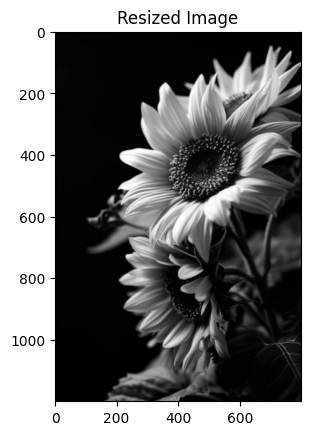

In [7]:
if __name__ == '__main__':
    #Input image path
    image_path = '/content/flower.jpg'
    # Read and display an image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.show()

    # Scale the image
    scale_factor = 2

    # Bilinear Interpolation
    scaled_image = bilinear_resize(image, scale_factor)

    # Display output image
    output_image_path = image_path[:-4]+'_output_image'+'_'+str(scale_factor)+'.jpg'
    cv2.imwrite(output_image_path, scaled_image)
    plt.imshow(scaled_image, cmap='gray')
    plt.title("Resized Image")
    plt.show()